In [13]:
##mineria
import numpy as np 
# Procesamiento de datos y carga de archivos CSV
import pandas as pd
# Librearía gráfica
import matplotlib.pylab as plt
# Librería para usar recursos del sistema operativo
import os 
# Librearía usada para extraer el nombre del archivo de cada path
import ntpath

dataCaracteristicas = pd.read_csv('dataset_atributos_extra_copy.csv')


dataCovid=pd.read_csv('dataset_copy.csv', delimiter=",")

In [18]:
dataCaracteristicas.head()

,region,pais,es_top_ten_gdp,edad_media,gdp_ranking,gdp_usd,gini,population,taza(muerte/1000)
0,Anhui,Mainland China,1,38.4,2.0,14140163.0,46.5,1439323776,8.2
1,Beijing,Mainland China,1,38.4,2.0,14140163.0,46.5,1439323776,8.2
2,Chongqing,Mainland China,1,38.4,2.0,14140163.0,46.5,1439323776,8.2
3,Fujian,Mainland China,1,38.4,2.0,14140163.0,46.5,1439323776,8.2
4,Gansu,Mainland China,1,38.4,2.0,14140163.0,46.5,1439323776,8.2


In [59]:
dataCovid.head()


,num_dia_desde_primer_caso,region,pais,num_confirmados,num_fallecidos,num_recuperados,acc_confirmados,acc_fallecidos,acc_recuperados
0,0,Anhui,Mainland China,1,0,0,1,0,0
1,0,Beijing,Mainland China,14,0,0,14,0,0
2,0,Chongqing,Mainland China,6,0,0,6,0,0
3,0,Fujian,Mainland China,1,0,0,1,0,0
4,0,Gansu,Mainland China,0,0,0,0,0,0


In [72]:
datatf=dataCovid.groupby(['region', 'pais']).agg(max_ = ('num_dia_desde_primer_caso', lambda data: data.idxmax()))
datatf.head()
dataM=dataCovid.iloc[dataCovid.groupby(['region', 'pais']).agg(max_ = ('num_dia_desde_primer_caso', lambda data: data.idxmax())).max_]
#dataM.head()
dataT=dataM.drop(['num_dia_desde_primer_caso', 'num_confirmados', 'num_fallecidos', 'num_recuperados'], axis=1)
dataT.head()
dataFinal=pd.merge(left=dataT, right=dataCaracteristicas, how="inner")
dataFinal.head(20)

,region,pais,acc_confirmados,acc_fallecidos,acc_recuperados,es_top_ten_gdp,edad_media,gdp_ranking,gdp_usd,gini,population,taza(muerte/1000)
0,"Montreal, QC",Canada,4,0,0,1,41.8,10.0,1730914.0,32.1,37742154,7.9
1,"Montreal, QC",Canada,4,0,0,1,41.8,10.0,1730914.0,32.1,37742154,7.9
2,"Montreal, QC",Canada,4,0,0,1,41.8,10.0,1730914.0,32.1,37742154,7.9
3,"Montreal, QC",Canada,4,0,0,1,41.8,10.0,1730914.0,32.1,37742154,7.9
4,"Montreal, QC",Canada,4,0,0,1,41.8,10.0,1730914.0,32.1,37742154,7.9
5,"Montreal, QC",Canada,4,0,0,1,41.8,10.0,1730914.0,32.1,37742154,7.9
6,"Montreal, QC",Canada,4,0,0,1,41.8,10.0,1730914.0,32.1,37742154,7.9
7,"Montreal, QC",Canada,4,0,0,1,41.8,10.0,1730914.0,32.1,37742154,7.9
8,"Montreal, QC",Canada,4,0,0,1,41.8,10.0,1730914.0,32.1,37742154,7.9
9,"Montreal, QC",Canada,4,0,0,1,41.8,10.0,1730914.0,32.1,37742154,7.9


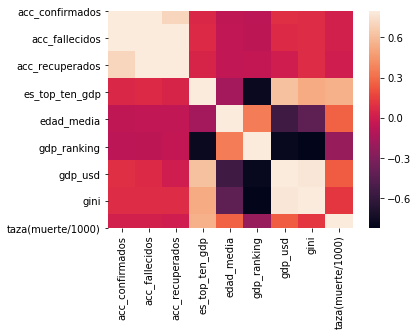

In [67]:
import seaborn as sns
corrmat = dataFinal.corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, vmax=.8, square=True);

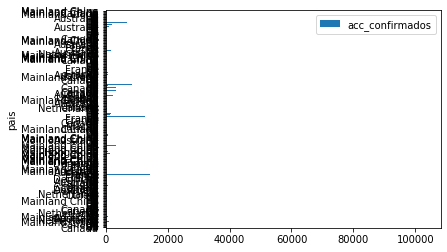

In [81]:
dataT.plot(x='pais',y='acc_confirmados',kind='barh')


In [259]:
data=pd.read_csv('dataset_copy.csv', delimiter=",")
dataset=pd.read_csv('datadensidad.csv',delimiter=",")


def myFun(x):
    
    print(x['pais'].values[0])
    paisAct=x['pais'].values[0]
    print(dataset[dataset['Pais']==paisAct])
    dens =dataset[dataset['Pais']==paisAct]
    print(dens['Densidad'])
    densidad=dens['Densidad']
    print("*****")
    
    
    
    return

In [260]:

data.groupby(["pais"]).apply(lambda x: myFun(x))



 Azerbaijan
Empty DataFrame
Columns: [Pais, Densidad]
Index: []
Series([], Name: Densidad, dtype: int64)
*****
('St. Martin',)
Empty DataFrame
Columns: [Pais, Densidad]
Index: []
Series([], Name: Densidad, dtype: int64)
*****
Afghanistan
Empty DataFrame
Columns: [Pais, Densidad]
Index: []
Series([], Name: Densidad, dtype: int64)
*****
Albania
       Pais  Densidad
83  Albania       100
83    100
Name: Densidad, dtype: int64
*****
Algeria
Empty DataFrame
Columns: [Pais, Densidad]
Index: []
Series([], Name: Densidad, dtype: int64)
*****
Andorra
       Pais  Densidad
50  Andorra       170
50    170
Name: Densidad, dtype: int64
*****
Angola
       Pais  Densidad
155  Angola        23
155    23
Name: Densidad, dtype: int64
*****
Antigua and Barbuda
Empty DataFrame
Columns: [Pais, Densidad]
Index: []
Series([], Name: Densidad, dtype: int64)
*****
Argentina
          Pais  Densidad
170  Argentina        16
170    16
Name: Densidad, dtype: int64
*****
Armenia
       Pais  Densidad
80  Armenia 

Index: []
Series([], Name: Densidad, dtype: int64)
*****
Kazakhstan
Empty DataFrame
Columns: [Pais, Densidad]
Index: []
Series([], Name: Densidad, dtype: int64)
*****
Kenya
Empty DataFrame
Columns: [Pais, Densidad]
Index: []
Series([], Name: Densidad, dtype: int64)
*****
Kosovo
       Pais  Densidad
197  Kosovo       162
197    162
Name: Densidad, dtype: int64
*****
Kuwait
      Pais  Densidad
34  Kuwait       247
34    247
Name: Densidad, dtype: int64
*****
Kyrgyzstan
Empty DataFrame
Columns: [Pais, Densidad]
Index: []
Series([], Name: Densidad, dtype: int64)
*****
Laos
     Pais  Densidad
148  Laos        28
148    28
Name: Densidad, dtype: int64
*****
Latvia
Empty DataFrame
Columns: [Pais, Densidad]
Index: []
Series([], Name: Densidad, dtype: int64)
*****
Lebanon
Empty DataFrame
Columns: [Pais, Densidad]
Index: []
Series([], Name: Densidad, dtype: int64)
*****
Liberia
        Pais  Densidad
137  Liberia        43
137    43
Name: Densidad, dtype: int64
*****
Libya
Empty DataFrame
Col

Index: []
Series([], Name: Densidad, dtype: int64)
*****
United Arab Emirates
Empty DataFrame
Columns: [Pais, Densidad]
Index: []
Series([], Name: Densidad, dtype: int64)
*****
Uruguay
        Pais  Densidad
162  Uruguay        20
162    20
Name: Densidad, dtype: int64
*****
Uzbekistan
           Pais  Densidad
106  Uzbekistan        74
106    74
Name: Densidad, dtype: int64
*****
Vatican City
Empty DataFrame
Columns: [Pais, Densidad]
Index: []
Series([], Name: Densidad, dtype: int64)
*****
Venezuela
          Pais  Densidad
143  Venezuela        34
143    34
Name: Densidad, dtype: int64
*****
Vietnam
       Pais  Densidad
28  Vietnam       281
28    281
Name: Densidad, dtype: int64
*****
West Bank and Gaza
Empty DataFrame
Columns: [Pais, Densidad]
Index: []
Series([], Name: Densidad, dtype: int64)
*****
Zambia
       Pais  Densidad
160  Zambia        21
160    21
Name: Densidad, dtype: int64
*****
Zimbabwe
Empty DataFrame
Columns: [Pais, Densidad]
Index: []
Series([], Name: Densidad, 

""


In [244]:
dataset.head(60)

,Pais,Densidad
0,Monaco,19307
1,Singapur,8017
2,Barein,2617
3,Malta,1387
4,Maldivas,1188
5,Banglades,1145
6,Barbados,660
7,Mauricio,621
8,Libano,560
9,San Marino,539


In [262]:

print([dataset['Pais']=="Monaco"])


[0       True
1      False
2      False
3      False
4      False
       ...  
193    False
194    False
195    False
196    False
197    False
Name: Pais, Length: 198, dtype: bool]


In [193]:
dataset=pd.read_csv('datadensidad.csv',delimiter=",")
print(dataset['pais'])

0           Monaco 
1         Singapur 
2           Barein 
3            Malta 
4         Maldivas 
           ...     
193      Hong Kong 
194      Palestina 
195         Taiwan 
196    Puerto Rico 
197         Kosovo 
Name: pais, Length: 198, dtype: object


,pais,Densidad(hab/km²)
0,Monaco,19 307
1,Singapur,8017
2,Barein,2617
3,Malta,1387
4,Maldivas,1188
